In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

Середньоквадратична помилка: 98.99539544355176


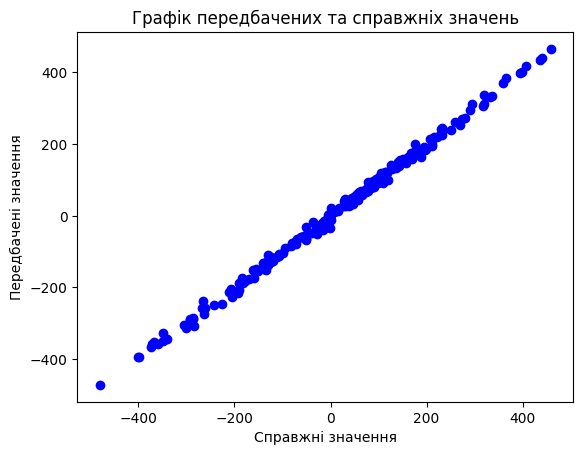

Матриця кореляції:
[[ 1.00000000e+00  1.97441840e-02  1.27427103e-02 -2.09998457e-03
  -1.07375210e-02 -1.50648908e-02  4.68289110e-02  4.79700897e-01]
 [ 1.97441840e-02  1.00000000e+00 -1.93191841e-02  5.03704814e-03
  -1.21869912e-03 -1.47548316e-02 -1.23381111e-02  2.83653428e-01]
 [ 1.27427103e-02 -1.93191841e-02  1.00000000e+00 -4.85316797e-02
  -6.16968125e-02 -7.50165912e-04  3.74458689e-02  4.87823534e-01]
 [-2.09998457e-03  5.03704814e-03 -4.85316797e-02  1.00000000e+00
   5.61911479e-02  2.86269829e-03 -3.25858055e-02  4.58234917e-01]
 [-1.07375210e-02 -1.21869912e-03 -6.16968125e-02  5.61911479e-02
   1.00000000e+00 -7.51153368e-03 -3.22460159e-02  3.64361691e-01]
 [-1.50648908e-02 -1.47548316e-02 -7.50165912e-04  2.86269829e-03
  -7.51153368e-03  1.00000000e+00 -4.00460521e-02  1.82337754e-01]
 [ 4.68289110e-02 -1.23381111e-02  3.74458689e-02 -3.25858055e-02
  -3.22460159e-02 -4.00460521e-02  1.00000000e+00  2.09590164e-01]
 [ 4.79700897e-01  2.83653428e-01  4.87823534e-01 

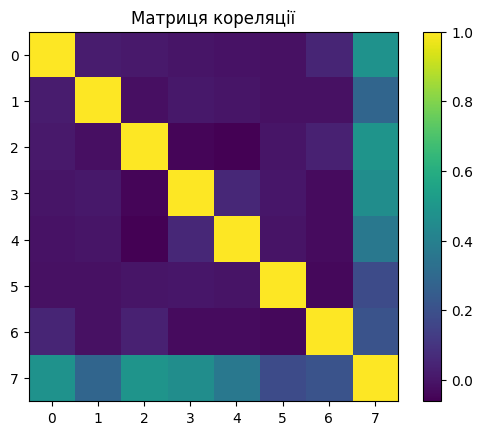

In [112]:
# Крок 2: Створення набору даних
n_samples = 1000  # Кількість прикладів
n_features = 7   # Кількість ознак
noise = 10       # Рівень шуму

X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise)

# Крок 3: Розділення даних на навчальний та тестовий набори
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Крок 4: Використання моделі лінійної регресії
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Середньоквадратична помилка: {mse}')

# Крок 5: Вивід графіка передбачених та справжніх значень
plt.scatter(y_test, y_pred, color='blue')
plt.title('Графік передбачених та справжніх значень')
plt.xlabel('Справжні значення')
plt.ylabel('Передбачені значення')
plt.show()

# Крок 6: Вивід матриці кореляції
correlation_matrix = np.corrcoef(X, y, rowvar=False)
print('Матриця кореляції:')
print(correlation_matrix)

# Візуалізація матриці кореляції
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.title('Матриця кореляції')
plt.colorbar()
plt.show()

         Date   Open   High    Low  Close  Volume Currency
0  2000-01-04  289.5  289.5  280.0  283.7   21621      USD
1  2000-01-05  283.7  285.0  281.0  282.1   25448      USD
2  2000-01-06  281.6  282.8  280.2  282.4   19055      USD
3  2000-01-07  282.5  284.5  282.0  282.9   11266      USD
4  2000-01-10  282.4  283.9  281.8  282.7   30603      USD


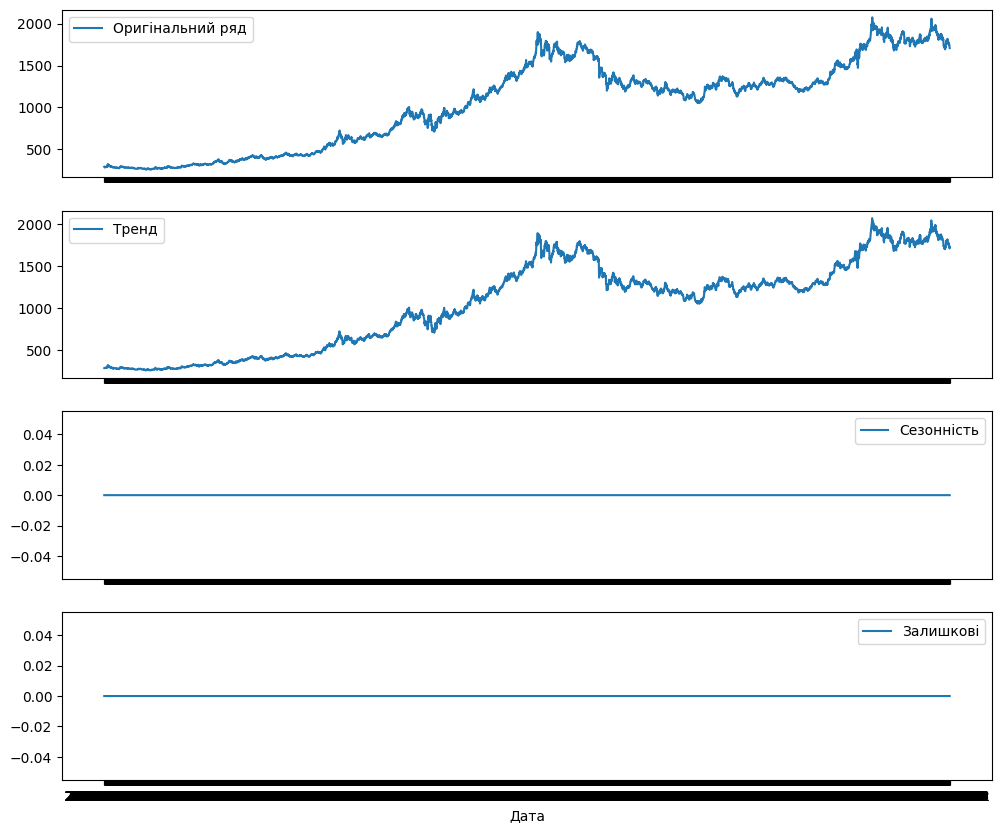

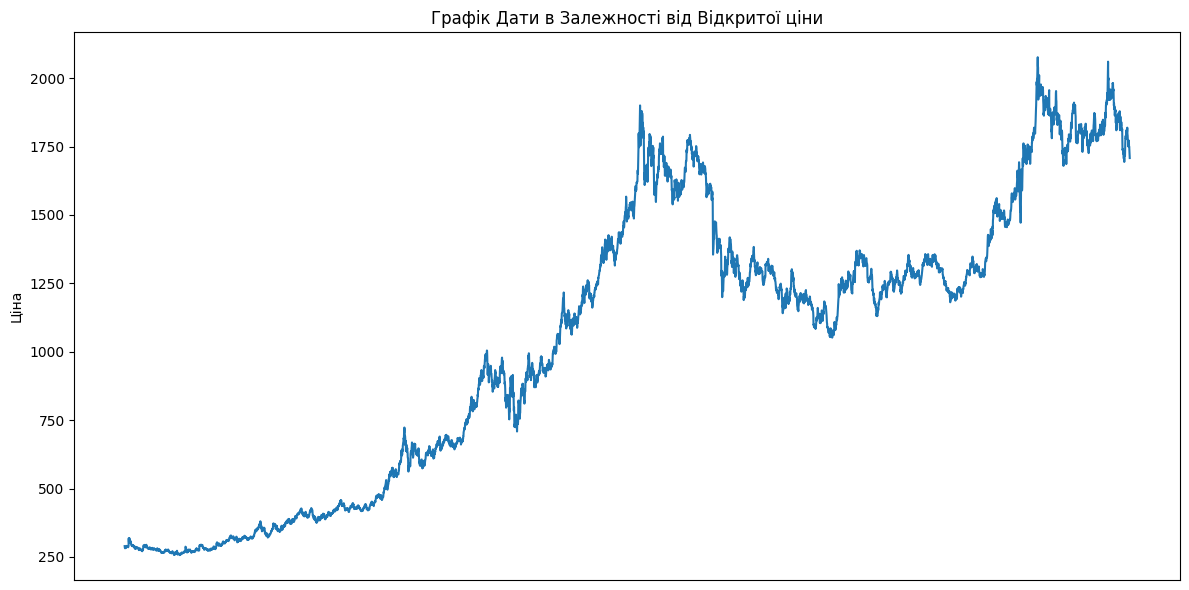

In [113]:
# Завантаження даних
data = pd.read_csv('./gold.csv')

# Виведення перших декількох рядків
print(data.head())

# Оберемо кожний рядок для побудови графіка
data_to_plot = data

# Розділення часового ряду на тренд, сезонність та залишкові
result = seasonal_decompose(data_to_plot['Close'], model='additive', period=1)

# Створення графіка
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Оригінальний часовий ряд
ax1.plot(data_to_plot['Date'], data_to_plot['Open'], label='Оригінальний ряд')
ax1.legend()

# Тренд
ax2.plot(data_to_plot['Date'], result.trend, label='Тренд')
ax2.legend()

# Сезонність
ax3.plot(data_to_plot['Date'], result.seasonal, label='Сезонність')
ax3.legend()

# Залишкові
ax4.plot(data_to_plot['Date'], result.resid, label='Залишкові')
ax4.legend()

# Створення графіка
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_to_plot['Date'], data_to_plot['Open'], label='Open')

# Налаштування графіка
ax.set_title('Графік Дати в Залежності від Відкритої ціни')
ax.set_xlabel('Дата')
ax.set_ylabel('Ціна')
ax.get_xaxis().set_visible(False)  # відключаємо підписи дат на осі x

# Налаштування графіків
ax4.set_xlabel('Дата')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()